Доржиев А.С. АБД19-1М

Доделать: график - тест и предикт - маркерами выделить (точками) - СДЕЛАНО

http://deep.uran.ru/wiki/index.php?title=Эксперименты_с_многослойным_перцептроном_в_Keras



In [ ]:
import tensorflow

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers 

model = keras.Sequential() # сеть прямого распространения
model.add(layers.Dense(64, kernel_initializer='uniform', input_shape=(10,)))
model.add(layers.Activation('sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentrapy', optimizer=opt)

In [ ]:
from keras import metrics

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD 
from keras.utils import np_utils

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
np.random.seed(1671)

NB_EPOCH = 200 
BATCH_SIZE = 128 
VERBOSE = 1 
NB_CLASSES = 10
OPTIMIZER = SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 

(X_train, y_train), (X_test, y_test) = mnist.load_data()
RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# так как черно-белые картинки
X_train /= 255 
X_test /= 255


print(X_train.shape[0], 'train_samples')
print(X_test.shape[0], 'test_samples')

Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

11493376/11490434 [==============================] - 0s 0us/step
60000 train_samples
10000 test_samples


In [ ]:
model = Sequential()
model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [ ]:
h = model.fit(X_train, Y_train, batch_size=25, epochs=10, verbose=VERBOSE, validation_split=0.3)

Epoch 1/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.8270 - accuracy: 0.8019 - val_loss: 0.5100 - val_accuracy: 0.8736
Epoch 2/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.4747 - accuracy: 0.8790 - val_loss: 0.4250 - val_accuracy: 0.8874
Epoch 3/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.4160 - accuracy: 0.8894 - val_loss: 0.3906 - val_accuracy: 0.8936
Epoch 4/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.3867 - accuracy: 0.8960 - val_loss: 0.3717 - val_accuracy: 0.8972
Epoch 5/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.3684 - accuracy: 0.9000 - val_loss: 0.3581 - val_accuracy: 0.9016
Epoch 6/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.3554 - accuracy: 0.9024 - val_loss: 0.3491 - val_accuracy: 0.9033
Epoch 7/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.3455 - accuracy: 0.9040 - val_loss: 0.3416 - val_accuracy:

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print(score[0], score[1])

#score[0] - loss
#score[1] - accuracy

313/313 [==============================] - 0s 1ms/step - loss: 0.3111 - accuracy: 0.9135
0.3110668361186981 0.9135000109672546


**Построить графики LOSS, ACCURACY**

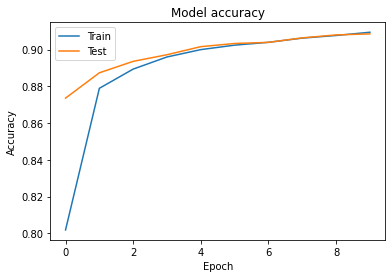

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy']) # для тренировочного 
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

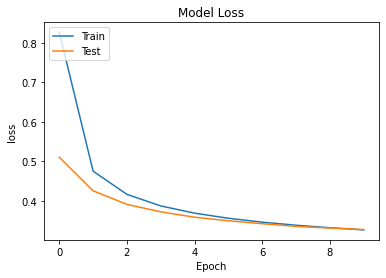

In [ ]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss']) # для тренировочного 
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Другая метрика**

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['mse'])

In [ ]:
h_1 = model.fit(X_train, Y_train, batch_size=25, epochs=10, verbose=VERBOSE, validation_split=0.3)

Epoch 1/10
1680/1680 [==============================] - 3s 2ms/step - loss: 0.3214 - mse: 0.0139 - val_loss: 0.3235 - val_mse: 0.0139
Epoch 2/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.3173 - mse: 0.0138 - val_loss: 0.3200 - val_mse: 0.0138
Epoch 3/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.3137 - mse: 0.0136 - val_loss: 0.3176 - val_mse: 0.0137
Epoch 4/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.3106 - mse: 0.0135 - val_loss: 0.3150 - val_mse: 0.0136
Epoch 5/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.3079 - mse: 0.0133 - val_loss: 0.3129 - val_mse: 0.0135
Epoch 6/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.3052 - mse: 0.0132 - val_loss: 0.3115 - val_mse: 0.0134
Epoch 7/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.3028 - mse: 0.0131 - val_loss: 0.3101 - val_mse: 0.0134
Epoch 8/10
1680/1680 [==============================] - 2s 1ms

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print(score[0], score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.2919 - mse: 0.0126
0.29185667634010315 0.012571040540933609


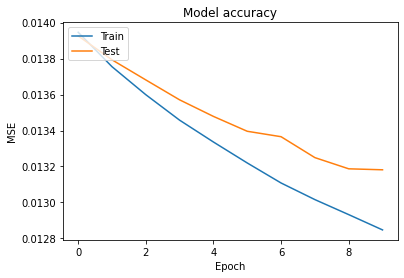

In [ ]:
# Plot training & validation accuracy values
plt.plot(h_1.history['mse'])
plt.plot(h_1.history['val_mse']) # для тренировочного 
plt.title('Model accuracy')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

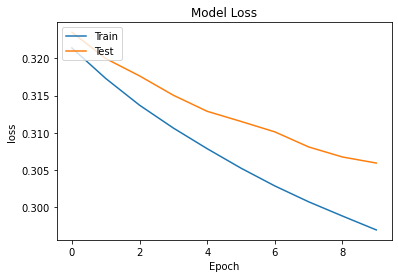

In [ ]:
plt.plot(h_1.history['loss'])
plt.plot(h_1.history['val_loss']) # для тренировочного 
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Задание 1 (для MNIST)**
1. Добавить скрытые слои (+ вывод результатов)
2. Добавить Dropout (+ вывод результатов)
3. Сравнить точность вычислений обеих сеток



Добавим скрытый слой

In [ ]:
model = Sequential()
model.add(Dense(50, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))  # кол-во скрытых нейронов - 10 
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 50)                39250     
_________________________________________________________________
activation_10 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [ ]:
h_hid_layer = model.fit(X_train, Y_train, batch_size=25, epochs=10, verbose=VERBOSE, validation_split=0.3)

Epoch 1/10
1680/1680 [==============================] - 3s 1ms/step - loss: 0.7664 - accuracy: 0.8052 - val_loss: 0.4040 - val_accuracy: 0.8914
Epoch 2/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.3694 - accuracy: 0.8971 - val_loss: 0.3302 - val_accuracy: 0.9060
Epoch 3/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.3159 - accuracy: 0.9107 - val_loss: 0.2976 - val_accuracy: 0.9155
Epoch 4/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.2851 - accuracy: 0.9190 - val_loss: 0.2781 - val_accuracy: 0.9183
Epoch 5/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.2629 - accuracy: 0.9253 - val_loss: 0.2605 - val_accuracy: 0.9247
Epoch 6/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.2452 - accuracy: 0.9306 - val_loss: 0.2456 - val_accuracy: 0.9290
Epoch 7/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.2305 - accuracy: 0.9340 - val_loss: 0.2356 - val_accuracy:

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print(score[0], score[1])

#score[0] - loss
#score[1] - accuracy

313/313 [==============================] - 0s 1ms/step - loss: 0.1952 - accuracy: 0.9424
0.1951766014099121 0.9423999786376953


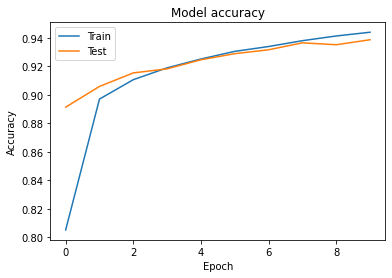

In [ ]:
# Plot training & validation accuracy values
plt.plot(h_hid_layer.history['accuracy'])
plt.plot(h_hid_layer.history['val_accuracy']) # для тренировочного 
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

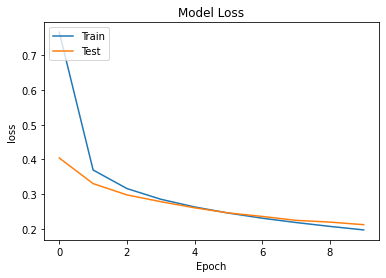

In [ ]:
plt.plot(h_hid_layer.history['loss'])
plt.plot(h_hid_layer.history['val_loss']) # для тренировочного 
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Попробуем с другой метрикой 

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['mse'])

In [ ]:
h_hid_layer_mse = model.fit(X_train, Y_train, batch_size=25, epochs=10, verbose=VERBOSE, validation_split=0.3)

Epoch 1/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.3173 - mse: 0.0138 - val_loss: 0.3117 - val_mse: 0.0134
Epoch 2/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.3162 - mse: 0.0138 - val_loss: 0.3113 - val_mse: 0.0134
Epoch 3/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.3139 - mse: 0.0137 - val_loss: 0.3083 - val_mse: 0.0133
Epoch 4/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.3124 - mse: 0.0137 - val_loss: 0.3078 - val_mse: 0.0133
Epoch 5/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.3111 - mse: 0.0136 - val_loss: 0.3056 - val_mse: 0.0132
Epoch 6/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.3085 - mse: 0.0135 - val_loss: 0.3042 - val_mse: 0.0131
Epoch 7/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.3071 - mse: 0.0134 - val_loss: 0.3035 - val_mse: 0.0131
Epoch 8/10
1680/1680 [==============================] - 2s 1ms

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print(score[0], score[1])

#score[0] - loss
#score[1] - mse

313/313 [==============================] - 0s 1ms/step - loss: 0.2859 - mse: 0.0123
0.28591275215148926 0.012259259819984436


Добавим Dropout

In [ ]:
model = Sequential()
model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
model.add(keras.layers.Dropout(0.01)) # dropout - замораживаем 0.01
model.add(Activation('softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                7850      
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [ ]:
h_drop_out = model.fit(X_train, Y_train, batch_size=25, epochs=10, verbose=VERBOSE, validation_split=0.3)

Epoch 1/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.8165 - accuracy: 0.8028 - val_loss: 0.5087 - val_accuracy: 0.8724
Epoch 2/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.4905 - accuracy: 0.8705 - val_loss: 0.4266 - val_accuracy: 0.8866
Epoch 3/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.4334 - accuracy: 0.8814 - val_loss: 0.3916 - val_accuracy: 0.8946
Epoch 4/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.4037 - accuracy: 0.8878 - val_loss: 0.3717 - val_accuracy: 0.8979
Epoch 5/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.3848 - accuracy: 0.8916 - val_loss: 0.3590 - val_accuracy: 0.9006
Epoch 6/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.3714 - accuracy: 0.8952 - val_loss: 0.3511 - val_accuracy: 0.9013
Epoch 7/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.3594 - accuracy: 0.8984 - val_loss: 0.3414 - val_accuracy:

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print(score[0], score[1])

#score[0] - loss
#score[1] - accuracy

313/313 [==============================] - 0s 1ms/step - loss: 0.3116 - accuracy: 0.9139
0.3116139769554138 0.9139000177383423


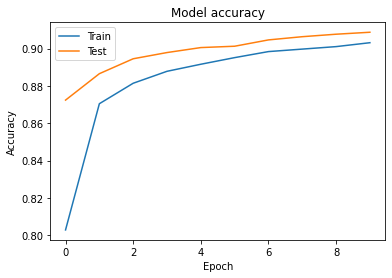

In [ ]:
# Plot training & validation accuracy values
plt.plot(h_drop_out.history['accuracy'])
plt.plot(h_drop_out.history['val_accuracy']) # для тренировочного 
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

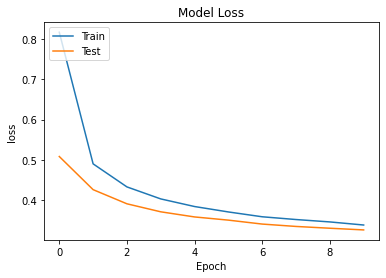

In [ ]:
plt.plot(h_drop_out.history['loss'])
plt.plot(h_drop_out.history['val_loss']) # для тренировочного 
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
### Для будущих работ: 
# Считаем графики ошибки
plt.plot(history.history['mean_absolute_error'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mean_absolute_error'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [ ]:
### Для будущих работ: 
# Разброс предсказаний может показать перекос, если есть
plt.scatter(y_test, pred) 
plt.xlabel('Правильные значение, $1K')
plt.ylabel('Предсказания, $1K')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()

# Задание 2
* Взять произвольную функцию четырех (8,12) аргументов и аппроксимировать ее нейронной сетью. 
* Какова оптимальная глубина сети для каждого количества аргументов, если функция линейная, квадратичная, трансцендентная, как связано количество аргументов и глубина сети?



In [ ]:
import pandas as pd

In [ ]:
x = pd.DataFrame()

#### Создаем общий датасэт

In [ ]:
for i in range(1,13): 
  name_x = 'x'+str(i)
  x[name_x] = np.array([np.random.randint(-100,100) for _ in range(100)])

In [ ]:
x.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
0,-22,-30,-44,11,36,-8,-35,58,-40,78,34,-42
1,60,53,4,41,40,78,80,-66,-26,95,75,58
2,95,11,89,14,-54,59,-53,-70,-34,-11,20,-74
3,37,-81,66,52,-87,96,-88,20,79,33,58,78
4,-85,-45,36,-39,-96,-79,-33,38,-29,89,45,35


## Функция 4 аргумента

In [ ]:
# Берем 4 аргумента
x_4 = x.iloc[:,0:4]

# Зададим фун-ции
x_4['y_lin'] = 2*x_4['x1']-x_4['x2']-5*x_4['x3']+10*x_4['x4']
x_4['y_sqr'] = x_4['x1']*x_4['x4']-x_4['x2']*x_4['x3']
x_4['y_trns'] = np.exp(x_4['x1']-2*x_4['x4']+x_4['x2']-x_4['x3'])

x_4.head()

,x1,x2,x3,x4,y_lin,y_sqr,y_trns
0,-22,-30,-44,11,316,-1562,9.357623e-14
1,60,53,4,41,457,2248,5.320482e+11
2,95,11,89,14,-126,351,1.670170e-05
3,37,-81,66,52,345,7270,1.150750e-93
4,-85,-45,36,-39,-695,4935,6.054602e-39


In [ ]:
x_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      100 non-null    int64  
 1   x2      100 non-null    int64  
 2   x3      100 non-null    int64  
 3   x4      100 non-null    int64  
 4   y_lin   100 non-null    int64  
 5   y_sqr   100 non-null    int64  
 6   y_trns  100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 5.6 KB


In [ ]:
# Выделяем признаки и таргет
X_4 = x_4.iloc[:, :-3]
y_4_lin = x_4['y_lin']
y_4_sqr = x_4['y_sqr']
y_4_trns = x_4['y_trns']

#### Разбиваем выборку на train и test

In [ ]:
X_4_train, X_4_test, y_4_lin_train, y_4_lin_test = train_test_split(X_4, y_4_lin, test_size=0.3, random_state=42)

In [ ]:
X_4_train.shape

(70, 4)

#### Задаем архитектуру сети (1 слой)

In [ ]:
model1 = Sequential()
model1.add(Dense(100, activation='relu', input_shape=(X_4.shape[1],)))
model1.add(Dense(1, activation='linear'))
model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               500       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


#### Обучение

In [ ]:
h1 = model1.fit(X_4_train, y_4_lin_train, epochs=500, verbose=0, validation_split=0.3)

In [ ]:
mse, mae = model1.evaluate(X_4_test, y_4_lin_test, verbose=0)
print("Средняя абсолютная ошибка:", mae)

#print('mae: ', model.evaluate(X_x_4_test, y_4_lin_test, verbose=0))

Средняя абсолютная ошибка: 8.676908493041992


#### Графики сравнения 

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

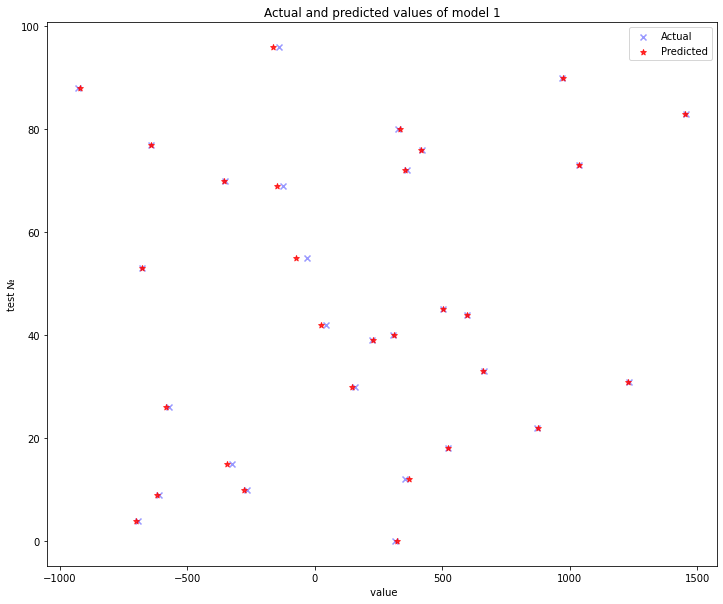

In [ ]:
_, ax = plt.subplots(figsize=(12, 10))

y_4_lin_pred_1 = model1.predict(X_4_test)
#y_4_lin_pred = y_4_lin_pred.reshape(30,)

ax.scatter(y =y_4_lin_test.index, x=y_4_lin_test, c = 'blue', label = 'Actual', alpha = 0.4, marker = 'x')
ax.scatter(y =y_4_lin_test.index, x=y_4_lin_pred_1, c = 'red', label = 'Predicted', alpha = 0.8, marker = '*')

plt.title('Actual and predicted values of model 1')
plt.ylabel('test №')
plt.xlabel(' value')
plt.legend()
plt.show()

#### архитектура 2 слоя

In [ ]:
model2 = Sequential()
model2.add(Dense(100, activation='relu', input_shape=(X_4.shape[1],)))
model2.add(Dense(50, activation='relu'))
model2.add(Dense(1, activation='linear'))
model2.compile(optimizer='adam', loss='mse', metrics=['mae'])

h_2 = model2.fit(X_4_train, y_4_lin_train, epochs=500, verbose=1, validation_split=0.3)
mse, mae = model2.evaluate(X_4_test, y_4_lin_test, verbose=1)
print("Средняя абсолютная ошибка:", mae)

Epoch 1/500
2/2 [==============================] - 0s 61ms/step - loss: 406037.9688 - mae: 528.6360 - val_loss: 422382.7500 - val_mae: 556.5497
Epoch 2/500
2/2 [==============================] - 0s 10ms/step - loss: 401155.0625 - mae: 525.2967 - val_loss: 417908.5625 - val_mae: 553.4751
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 396299.1875 - mae: 522.0714 - val_loss: 413451.8438 - val_mae: 550.3870
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 391936.2500 - mae: 519.1042 - val_loss: 409056.4688 - val_mae: 547.3153
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 387584.8125 - mae: 516.1483 - val_loss: 404721.9062 - val_mae: 544.2602
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 383276.0312 - mae: 513.1846 - val_loss: 400383.6250 - val_mae: 541.2529
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 378957.3750 - mae: 510.1772 - val_loss: 395986.0000 - val_mae: 53

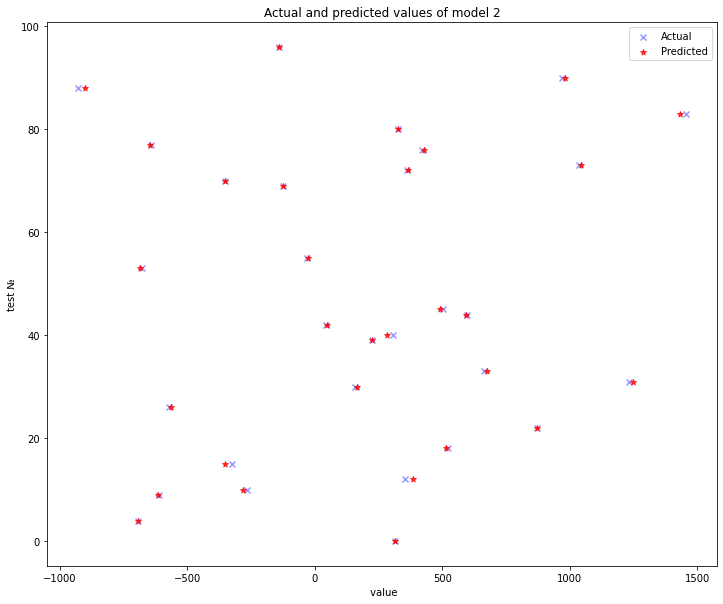

In [ ]:
_, ax = plt.subplots(figsize=(12, 10))

y_4_lin_pred_2 = model2.predict(X_4_test)
#y_4_lin_pred = y_4_lin_pred.reshape(30,)

ax.scatter(y =y_4_lin_test.index, x=y_4_lin_test, c = 'blue', label = 'Actual', alpha = 0.4, marker = 'x')
ax.scatter(y =y_4_lin_test.index, x=y_4_lin_pred_2, c = 'red', label = 'Predicted', alpha = 0.8, marker = '*')

plt.title('Actual and predicted values of model 2')
plt.ylabel('test №')
plt.xlabel(' value')
plt.legend()
plt.show()

#### архитектура 3 слоя

In [ ]:
model3 = Sequential()
model3.add(Dense(100, activation='relu', input_shape=(X_4.shape[1],)))
model3.add(Dense(50, activation='relu'))
model3.add(Dense(10, activation='relu'))
model3.add(Dense(1, activation='linear'))
model3.compile(optimizer='adam', loss='mse', metrics=['mae'])

h_3 = model3.fit(X_4_train, y_4_lin_train, epochs=500, verbose=1, validation_split=0.3)
mse, mae = model3.evaluate(X_4_test, y_4_lin_test, verbose=0)
print("Средняя абсолютная ошибка:", mae)

Epoch 1/500
2/2 [==============================] - 0s 93ms/step - loss: 402710.3750 - mae: 527.4344 - val_loss: 420557.7500 - val_mae: 556.7720
Epoch 2/500
2/2 [==============================] - 0s 14ms/step - loss: 397641.9688 - mae: 523.9689 - val_loss: 415171.4375 - val_mae: 553.2980
Epoch 3/500
2/2 [==============================] - 0s 17ms/step - loss: 392826.8438 - mae: 520.8355 - val_loss: 409793.8438 - val_mae: 549.8093
Epoch 4/500
2/2 [==============================] - 0s 15ms/step - loss: 387396.8125 - mae: 517.1628 - val_loss: 404849.0000 - val_mae: 546.5153
Epoch 5/500
2/2 [==============================] - 0s 14ms/step - loss: 383030.2500 - mae: 513.8596 - val_loss: 399749.8125 - val_mae: 543.0682
Epoch 6/500
2/2 [==============================] - 0s 15ms/step - loss: 377287.1875 - mae: 509.9539 - val_loss: 394656.4688 - val_mae: 539.7030
Epoch 7/500
2/2 [==============================] - 0s 14ms/step - loss: 372075.2188 - mae: 505.9299 - val_loss: 389172.9688 - val_mae: 5

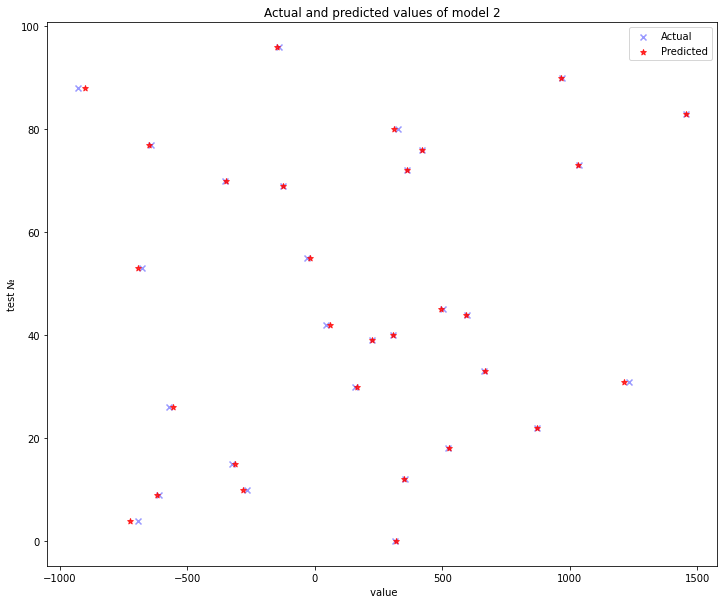

In [ ]:
_, ax = plt.subplots(figsize=(12, 10))

y_4_lin_pred_3 = model3.predict(X_4_test)


ax.scatter(y =y_4_lin_test.index, x=y_4_lin_test, c = 'blue', label = 'Actual', alpha = 0.4, marker = 'x')
ax.scatter(y =y_4_lin_test.index, x=y_4_lin_pred_3, c = 'red', label = 'Predicted', alpha = 0.8, marker = '*')

plt.title('Actual and predicted values of model 2')
plt.ylabel('test №')
plt.xlabel(' value')
plt.legend()
plt.show()

### Зададим функцию для обучения по всем функциям

In [ ]:
def train_model(X, y, func, arg_cnt): 
  
  # Надо ли нормализовывать 

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  
  #### Сети #### 
  
  # 1 слой
  model1 = Sequential()
  model1.add(Dense(100, activation='relu', input_shape=(X.shape[1],)))
  model1.add(Dense(1, activation='linear'))
  model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

  h1 = model1.fit(X_train, y_train, epochs=400, verbose=0, validation_split=0.3)
  
  mse_train, mae_train = model1.evaluate(X_train, y_train, verbose=0)
  mse_test, mae_test = model1.evaluate(X_test, y_test, verbose=0)
  
  result1 = pd.DataFrame({ 'arg_cnt': arg_cnt, 'func': func, 'dense_cnt': 1, 
                          'mae_train': mae_train, 'mae_test': mae_test
                          }, index=[0])
  
  # 2 слоя 
  model2 = Sequential()
  model2.add(Dense(100, activation='relu', input_shape=(X.shape[1],)))
  model2.add(Dense(50, activation='relu'))
  model2.add(Dense(1, activation='linear'))
  model2.compile(optimizer='adam', loss='mse', metrics=['mae'])

  h2 = model2.fit(X_train, y_train, epochs=400, verbose=0, validation_split=0.3)

  mse_train, mae_train = model2.evaluate(X_train, y_train, verbose=0)
  mse_test, mae_test = model2.evaluate(X_test, y_test, verbose=0)
  
  result2 = pd.DataFrame({ 'arg_cnt': arg_cnt, 'func': func, 'dense_cnt': 2, 
                          'mae_train': mae_train, 'mae_test': mae_test
                          }, index=[0])

  # 3 слоя
  model3 = Sequential()
  model3.add(Dense(100, activation='relu', input_shape=(X.shape[1],)))
  model3.add(Dense(50, activation='relu'))
  model3.add(Dense(10, activation='relu'))
  model3.add(Dense(1, activation='linear')) ## Поменить на другую актив-цию - тангенсальные, эксп-ая
  model3.compile(optimizer='adam', loss='mse', metrics=['mae'])

  h3 = model3.fit(X_train, y_train, epochs=400, verbose=0, validation_split=0.3)

  mse_train, mae_train = model3.evaluate(X_train, y_train, verbose=0)
  mse_test, mae_test = model3.evaluate(X_test, y_test, verbose=0)
  
  # Графики сравнения моделей
  for i in enumerate([model1, model2, model3]):
    _, ax = plt.subplots(figsize=(12, 10))

    y_pred = i[1].predict(X_test)

    ax.scatter(y =y_test.index, x=y_test, c = 'blue', label = 'Actual', alpha = 0.4, marker = 'x')
    ax.scatter(y =y_test.index, x=y_pred, c = 'red', label = 'Predicted', alpha = 0.8, marker = '*')

    plt.title('Actual and predicted values of model '+str(i[0]) + ' ' + func)
    plt.ylabel('test №')
    plt.xlabel(' value')
    plt.legend()
    plt.show()

  # Результат по моделям в виде датафрэйма
  result3 = pd.DataFrame({ 'arg_cnt': arg_cnt, 'func': func, 'dense_cnt': 3, 
                          'mae_train': mae_train, 'mae_test': mae_test
                          }, index=[0])
  result = pd.concat([result1, result2, result3])
  result = result.reset_index(drop=True)
  return result
 

In [ ]:
def get_res_4(x): 

  #####  Функция 4 элементов ##### 
  # Все переменные
  x_4 = x.iloc[:,0:4]

  # Зададим фун-цию
  x_4['y_lin'] = 2*x_4['x1']-x_4['x2']-5*x_4['x3']+10*x_4['x4']
  x_4['y_sqr'] = x_4['x1']*x_4['x4']-x_4['x2']*x_4['x3']
  x_4['y_trns'] = np.sin(x_4['x1']-2*x_4['x4']+x_4['x2']-x_4['x3'])
  
  # Аргументы  
  X_x_4 = x_4.iloc[:, :-3]
  #X_x_4 = X_x_4.values
  
  # Значения функции
  y_4_lin = x_4['y_lin']#.values
  y_4_sqr = x_4['y_sqr']#.values
  y_4_trns = x_4['y_trns']#.values
  
  result_4 = pd.DataFrame()

  result_4 = pd.concat([result_4, train_model(X_x_4, y_4_lin, 'lin', 4)])
  result_4 = pd.concat([result_4, train_model(X_x_4, y_4_sqr, 'sqr', 4)])
  result_4 = pd.concat([result_4, train_model(X_x_4, y_4_trns, 'trns', 4)])
  
  result_4 = result_4.reset_index(drop=True)

  return result_4

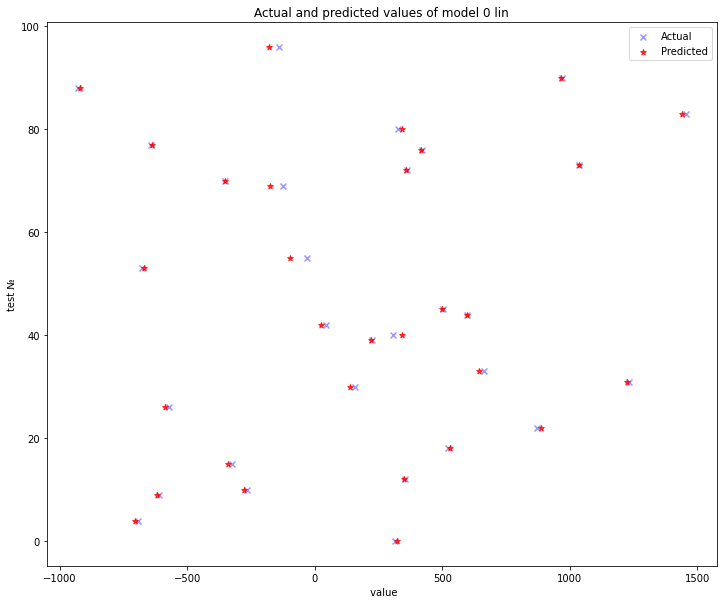

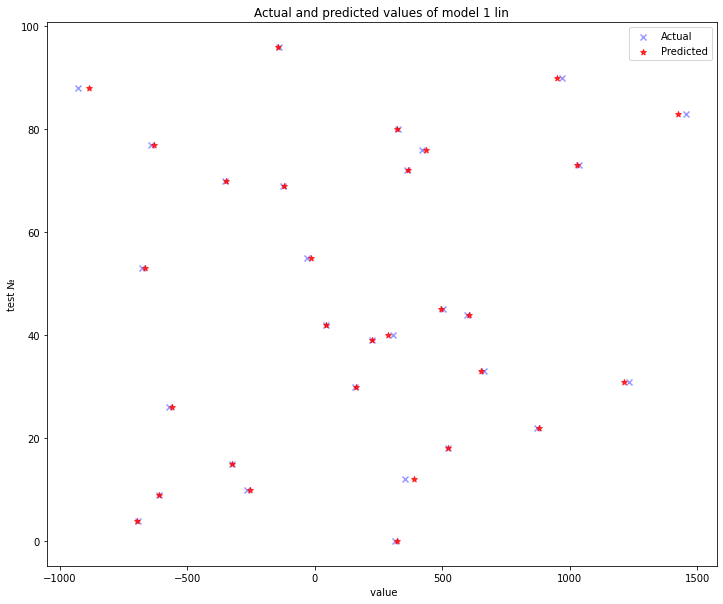

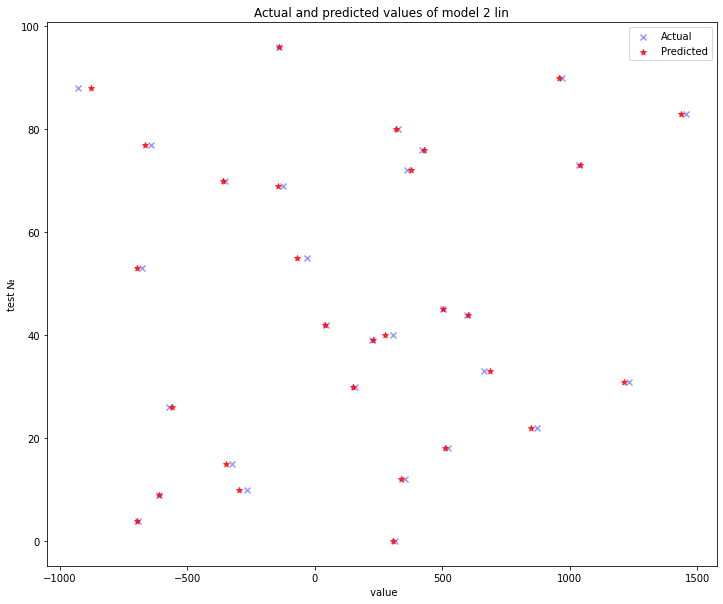

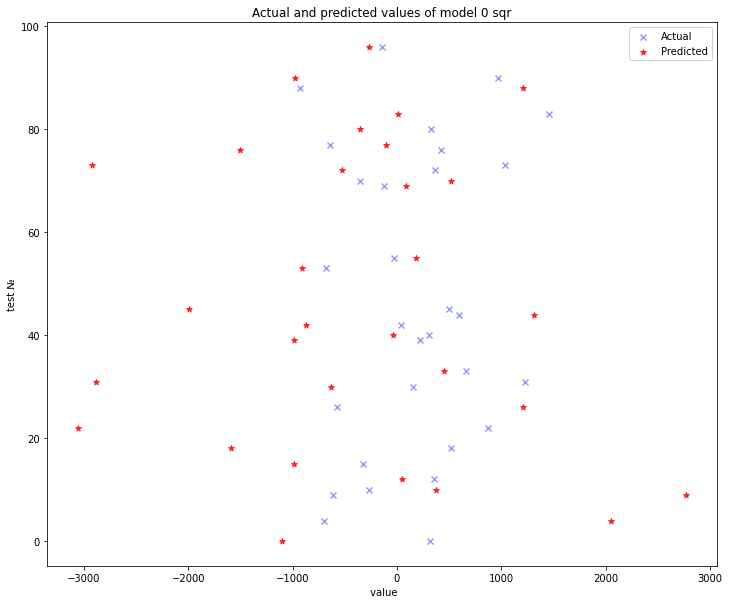

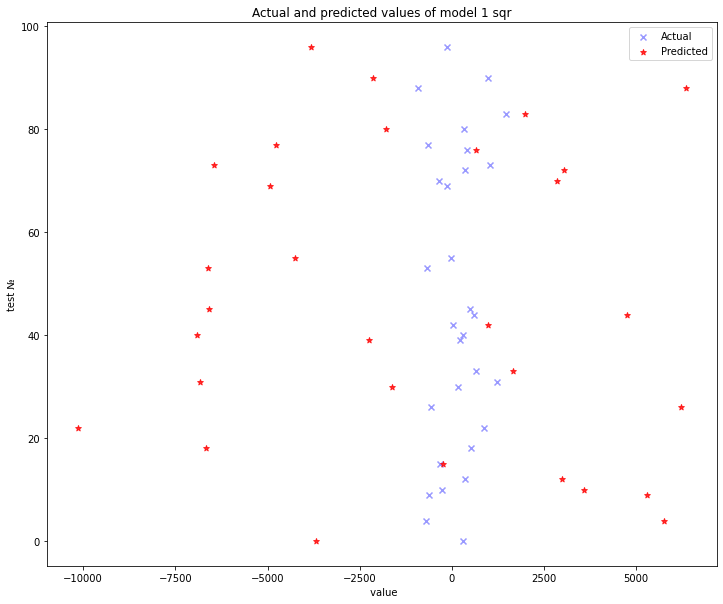

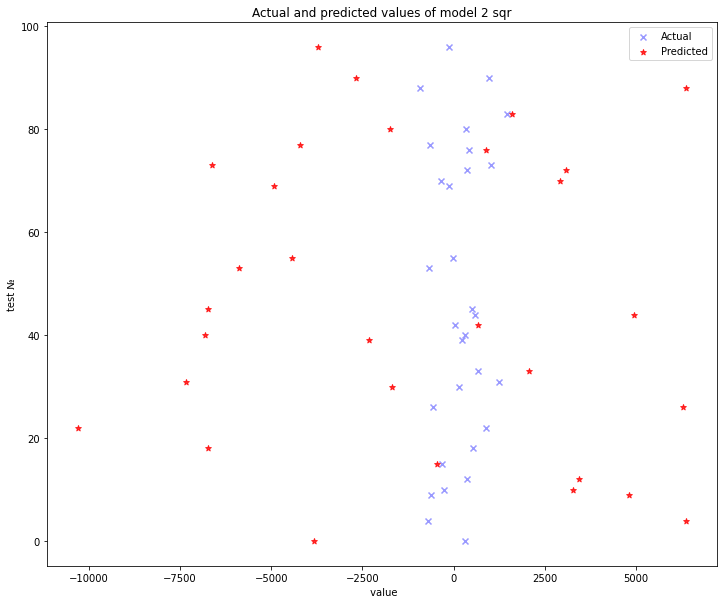

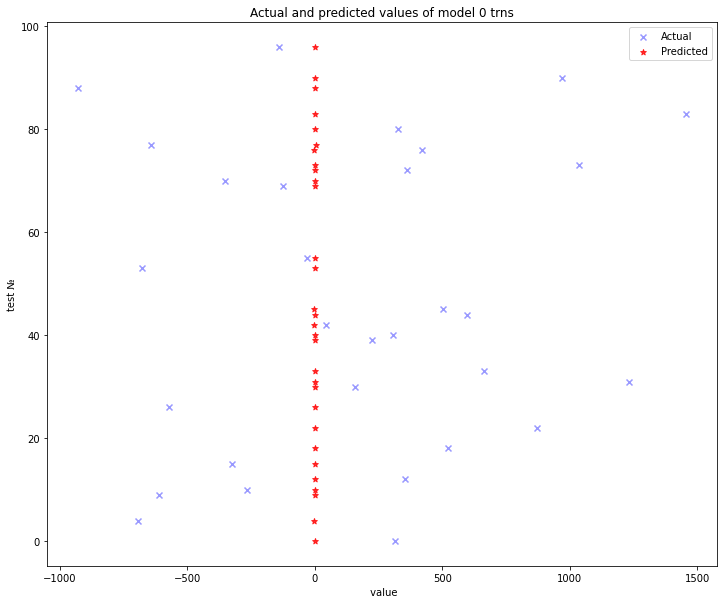

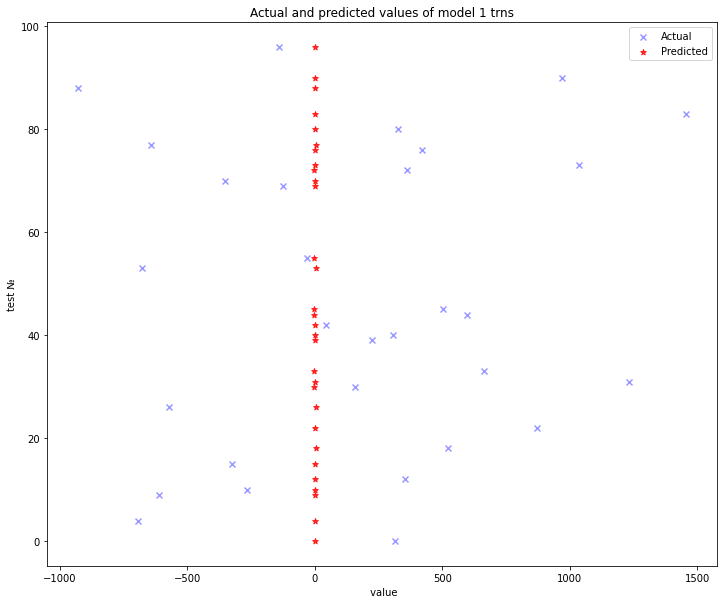

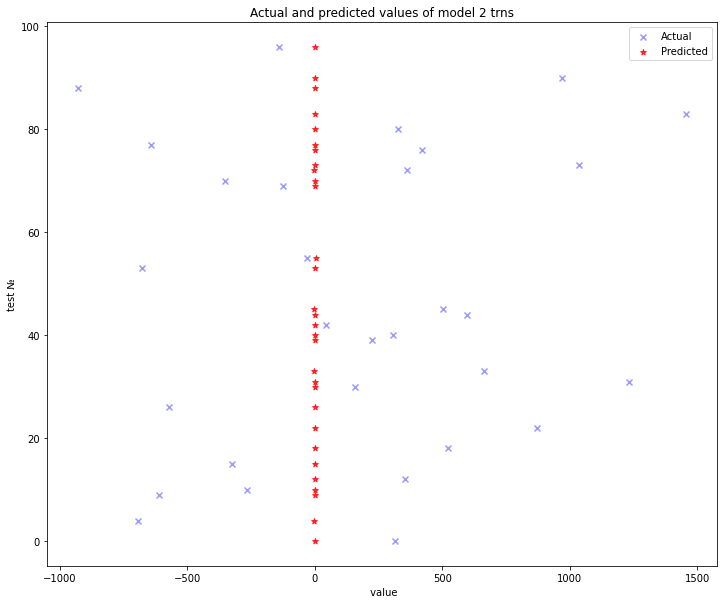

,arg_cnt,func,dense_cnt,mae_train,mae_test
0,4,lin,1,12.770180,14.164221
1,4,lin,2,3.879875,10.624853
2,4,lin,3,5.446594,15.009955
3,4,sqr,1,2718.449463,3034.251709
4,4,sqr,2,377.026917,606.085083
5,4,sqr,3,279.162109,662.918335
6,4,trns,1,0.464830,1.185156
7,4,trns,2,0.596170,1.478372
8,4,trns,3,0.359365,1.170555


In [ ]:
res_4 = get_res_4(x)
res_4 

### Функция 8 аргументов

In [ ]:
def get_res_8(x): 

  #####  Функция 4 элементов ##### 
  # Все переменные
  x_8 = x.iloc[:,0:8]

  # Зададим фун-цию
  x_8['y_lin'] = 2*x_8['x1']+x_8['x2']-5*x_8['x3']+10*x_8['x4']+10*x_8['x5']+x_8['x6']-15*x_8['x7']+22*x_8['x8']
  x_8['y_sqr'] = 2*x_8['x1']*x_8['x2']-5*x_8['x3']+x_8['x4']*x_8['x5']+x_8['x6']*x_8['x7']+2*x_8['x8']
  x_8['y_trns'] = np.sin(x_8['x1']-x_8['x3']-x_8['x4']+x_8['x5']-x_8['x7']+x_8['x8'])
  
  # Аргументы  
  X_x_8 = x_8.iloc[:, :-3]
  #X_x_8 = X_x_8.values
  
  # Значения функции
  y_8_lin = x_8['y_lin']#.values
  y_8_sqr = x_8['y_sqr']#.values
  y_8_trns = x_8['y_trns']#.values
  
  result_8 = pd.DataFrame()

  result_8 = pd.concat([result_8, train_model(X_x_8, y_8_lin, 'lin', 8)])
  result_8 = pd.concat([result_8, train_model(X_x_8, y_8_sqr, 'sqr', 8)])
  result_8 = pd.concat([result_8, train_model(X_x_8, y_8_trns, 'trns', 8)])
  
  result_8 = result_8.reset_index(drop=True)

  return result_8

m1 done
m2 done
m3 done


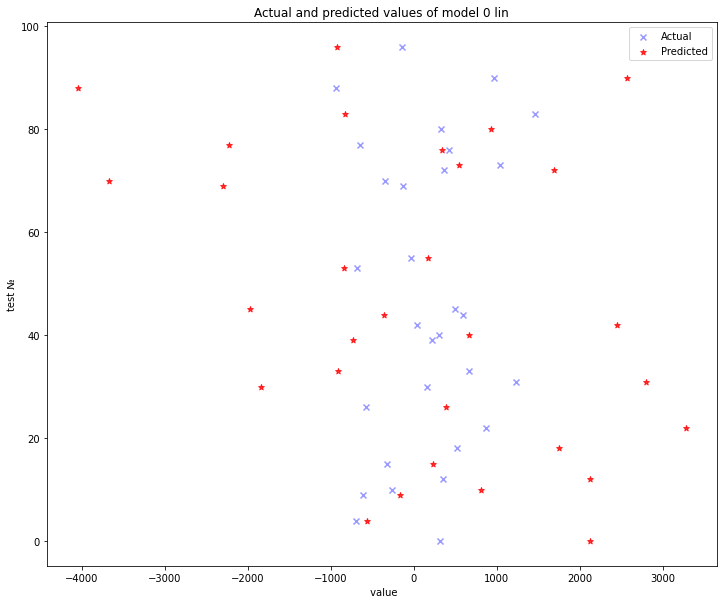

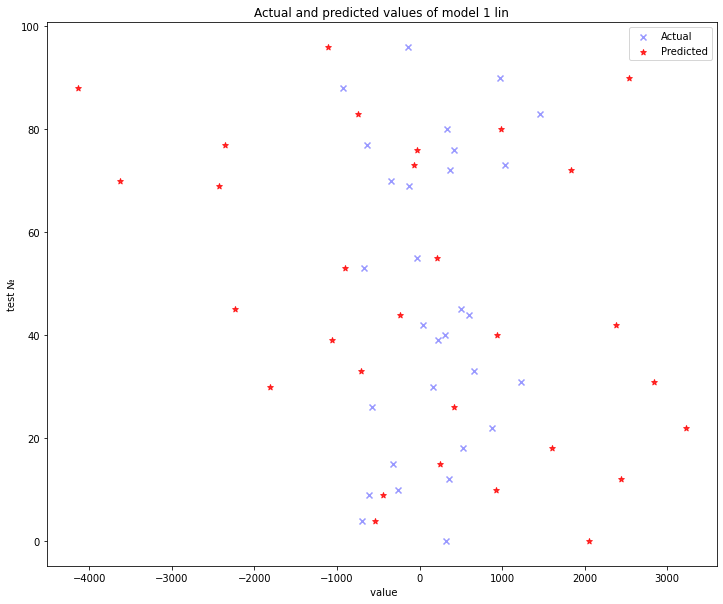

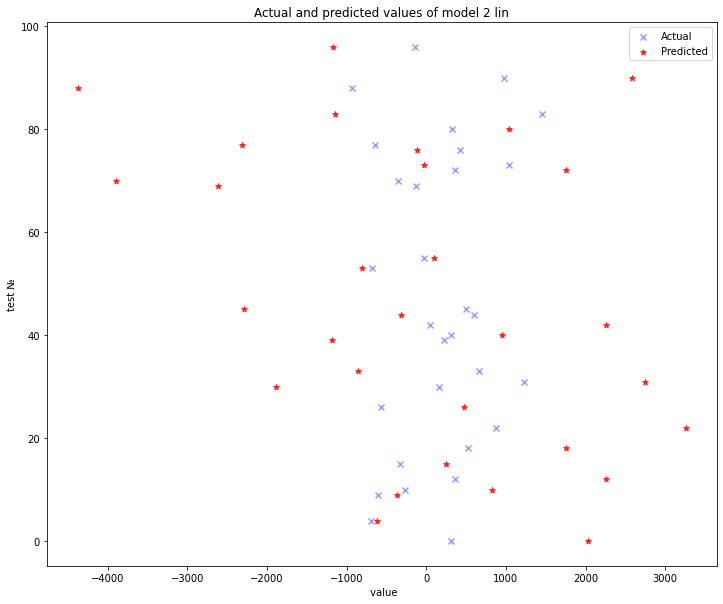

m1 done
m2 done
m3 done


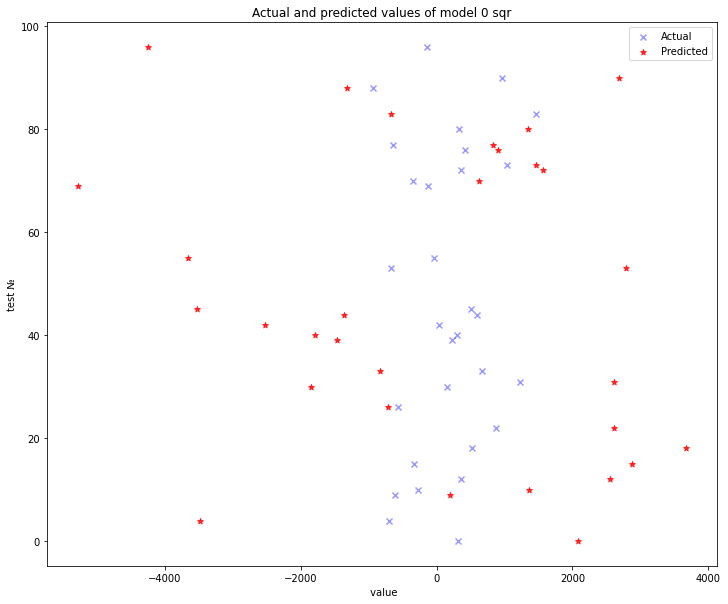

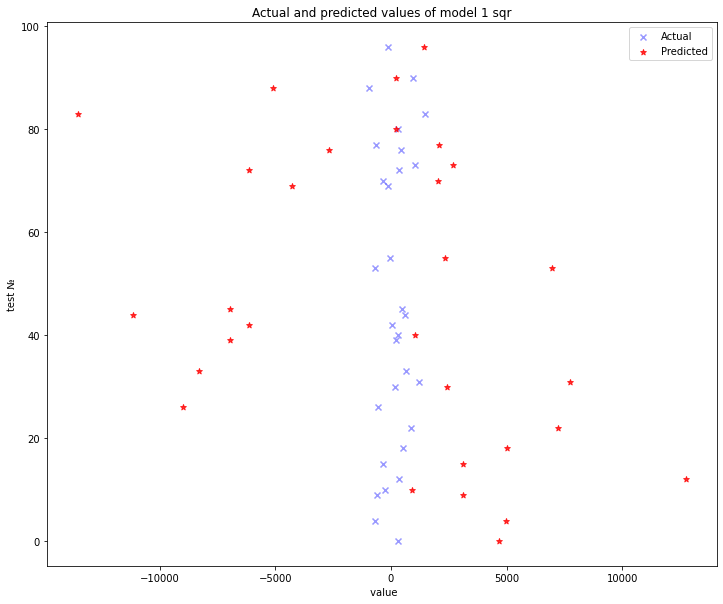

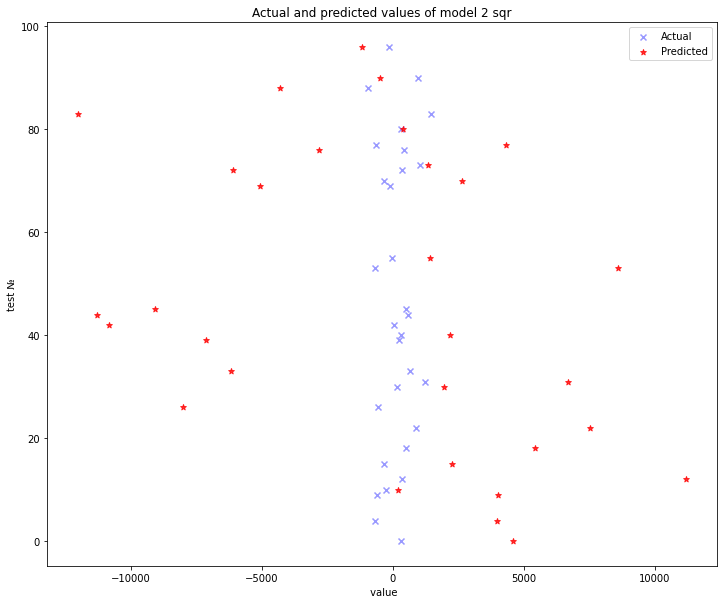

m1 done
m2 done
m3 done


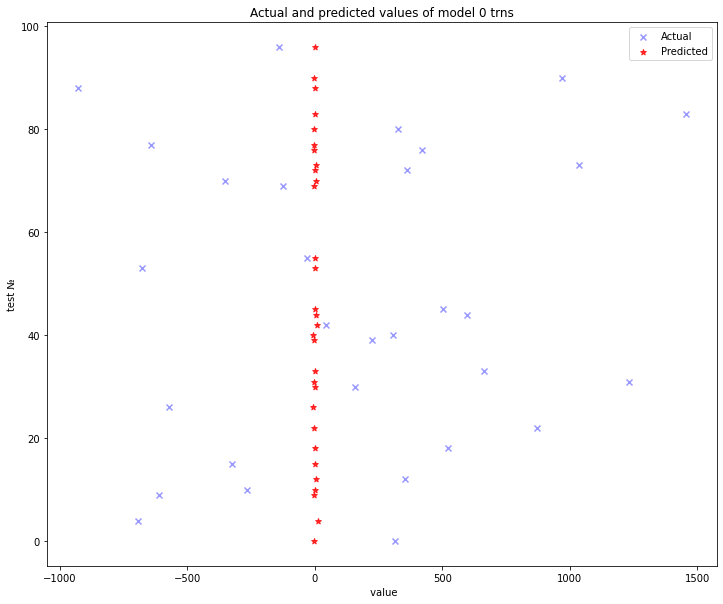

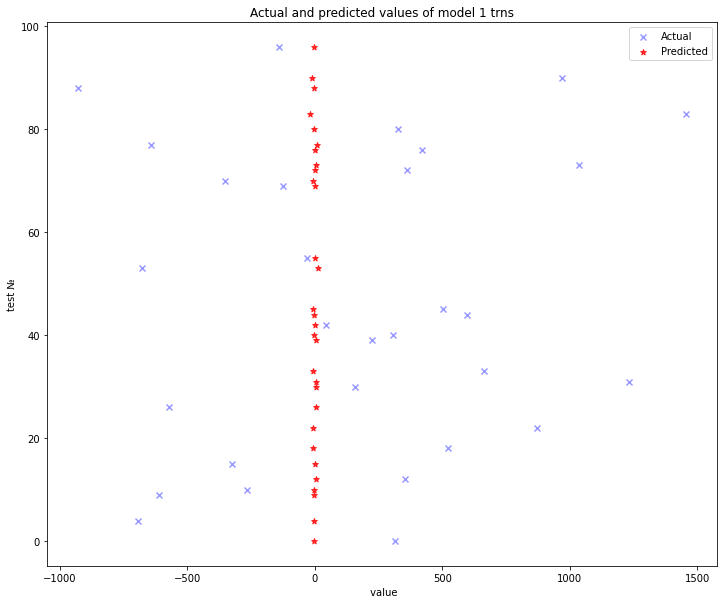

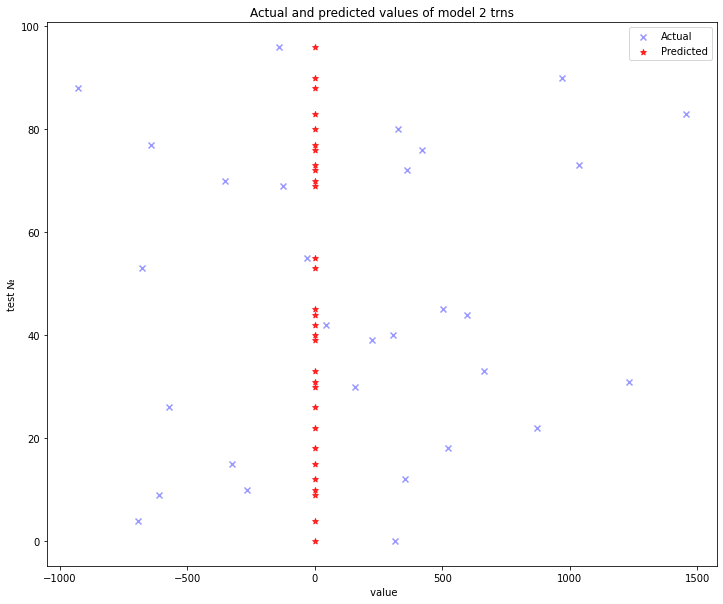

,arg_cnt,func,dense_cnt,mae_train,mae_test
0,8,lin,1,119.302612,242.131454
1,8,lin,2,41.540565,143.132233
2,8,lin,3,34.961678,143.249222
3,8,sqr,1,5408.294434,5562.991699
4,8,sqr,2,1375.307129,2833.458496
5,8,sqr,3,1221.616333,2796.449951
6,8,trns,1,1.085854,3.132480
7,8,trns,2,1.674652,4.873778
8,8,trns,3,0.454821,0.663083


In [ ]:
res_8 = get_res_8(x)
res_8 

## Функция 12 аргументов

In [ ]:
def get_res_12(x): 

  #####  Функция 4 элементов ##### 
  # Все переменные
  x_12 = x.iloc[:,0:12]

  # Зададим фун-цию
  x_12['y_lin'] = x_12['x1']+x_12['x2']-3*x_12['x3']+3*x_12['x4']+2*x_12['x5']+x_12['x6']-15*x_12['x7']+2*x_12['x8']+10*x_12['x9']+x_12['x10']-x_12['x11']+x_12['x12']
  x_12['y_sqr'] = 2*x_12['x1']*x_12['x2']-5*x_12['x3']+x_12['x4']*x_12['x5']+x_12['x6']*x_12['x7']+2*x_12['x8']+9*x_12['x9']*x_12['x10']-x_12['x11']*x_12['x12']
  x_12['y_trns'] = np.sin(x_12['x3'])+x_12['x4']*x_12['x5']+x_12['x7']+22*x_12['x8']+x_12['x9']*x_12['x10']-10*x_12['x11']+x_12['x12']

  # Аргументы  
  X_x_12 = x_12.iloc[:, :-3]
  #X_x_12 = X_x_12.values
  
  # Значения функции
  y_12_lin = x_12['y_lin']#.values
  y_12_sqr = x_12['y_sqr']#.values
  y_12_trns = x_12['y_trns']#.values
  
  result_12 = pd.DataFrame()

  result_12 = pd.concat([result_12, train_model(X_x_12, y_12_lin, 'lin', 12)])
  result_12 = pd.concat([result_12, train_model(X_x_12, y_12_sqr, 'sqr', 12)])
  result_12 = pd.concat([result_12, train_model(X_x_12, y_12_trns, 'trns', 12)])
  
  result_12 = result_12.reset_index(drop=True)

  return result_12

m1 done
m2 done
m3 done


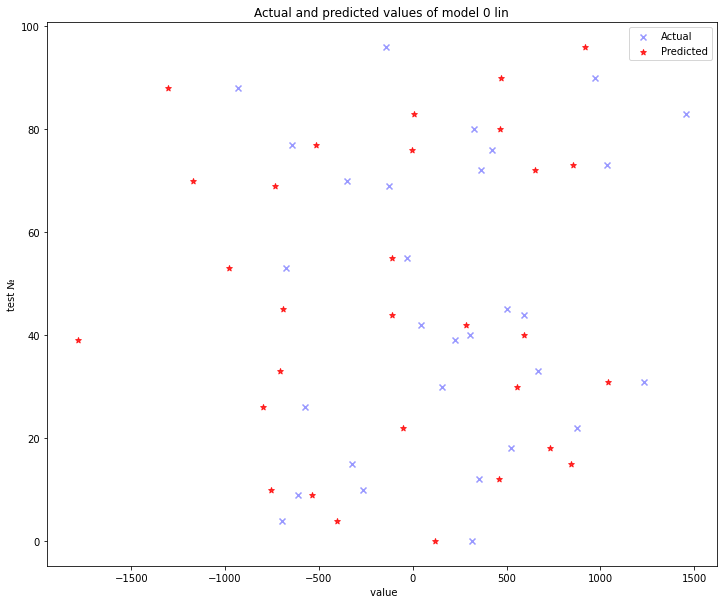

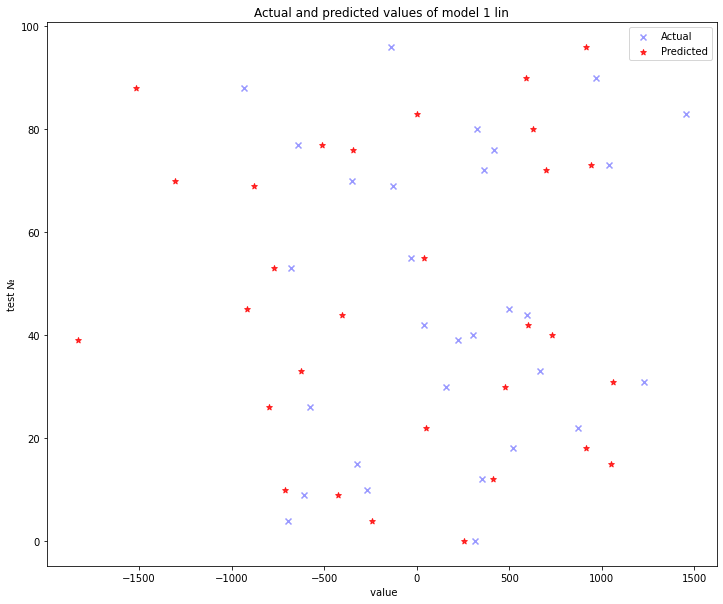

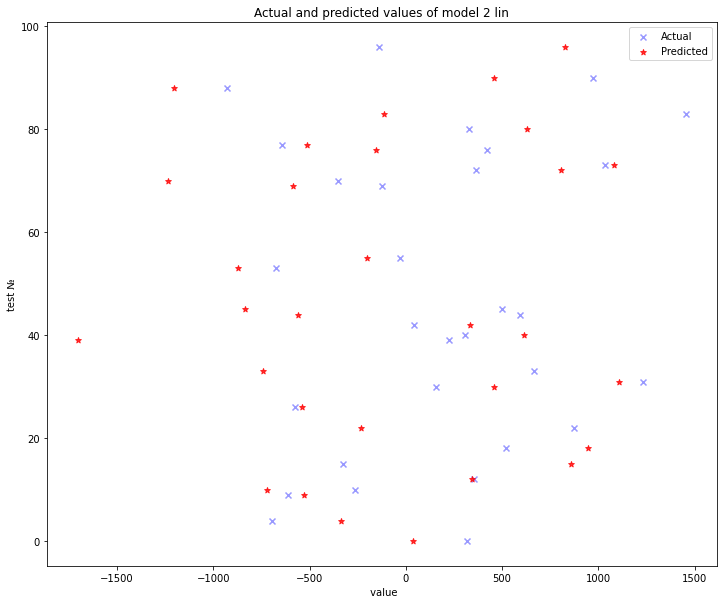

m1 done
m2 done
m3 done


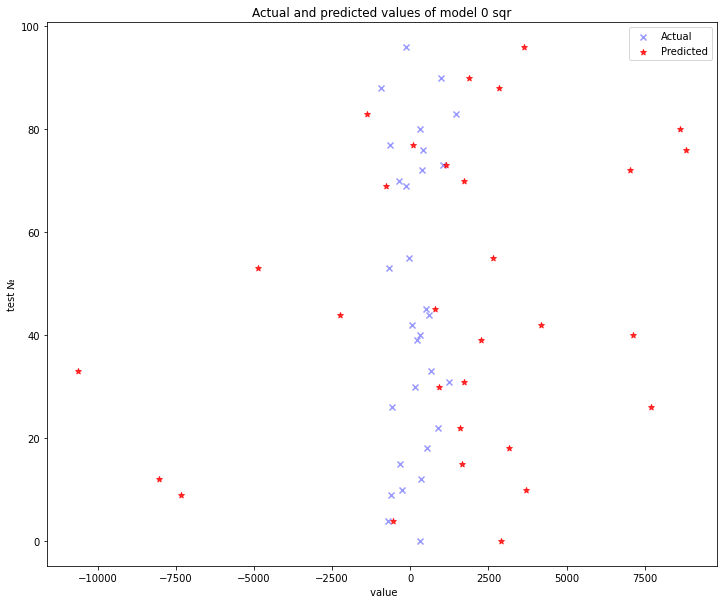

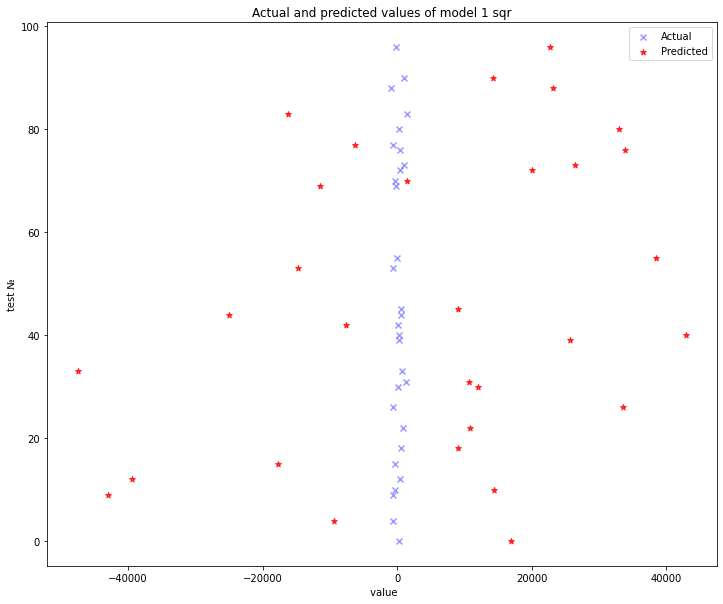

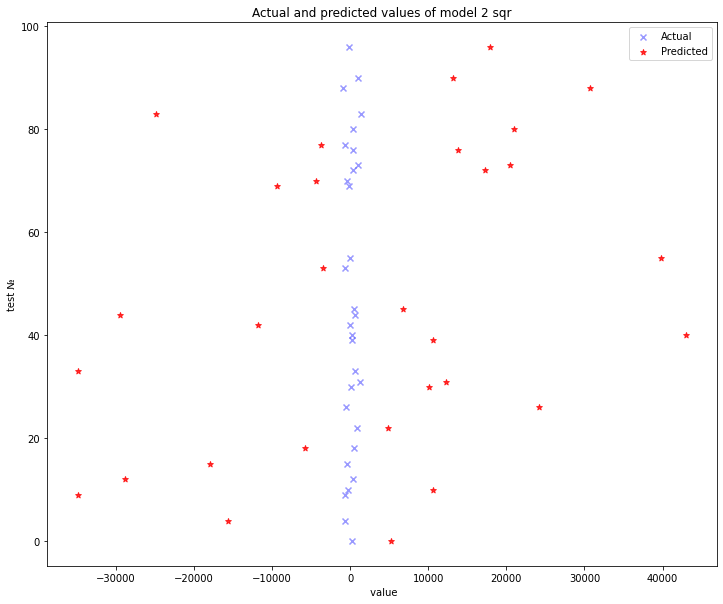

m1 done
m2 done
m3 done


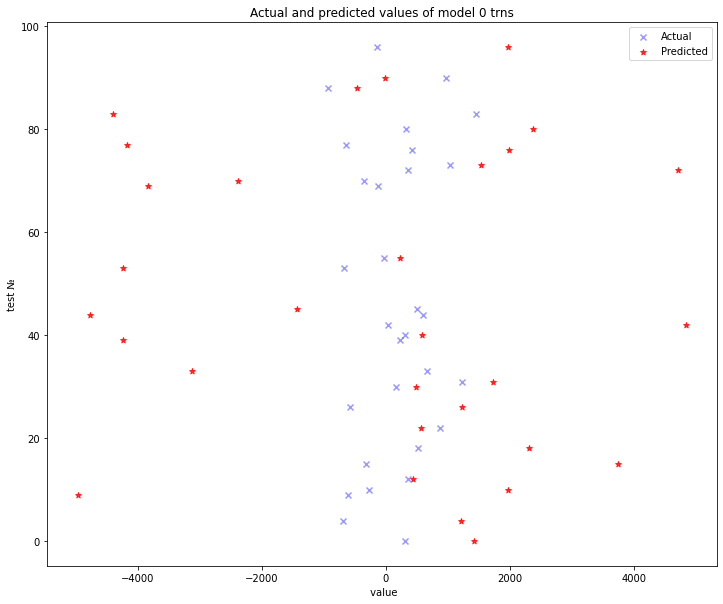

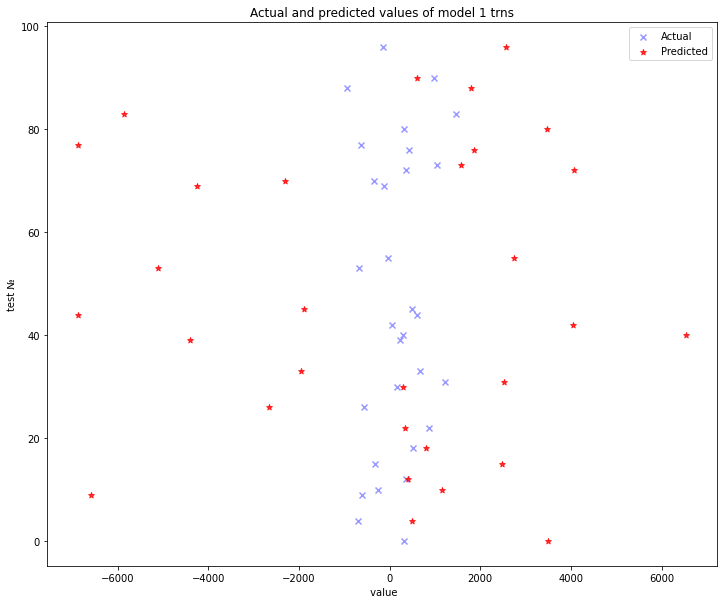

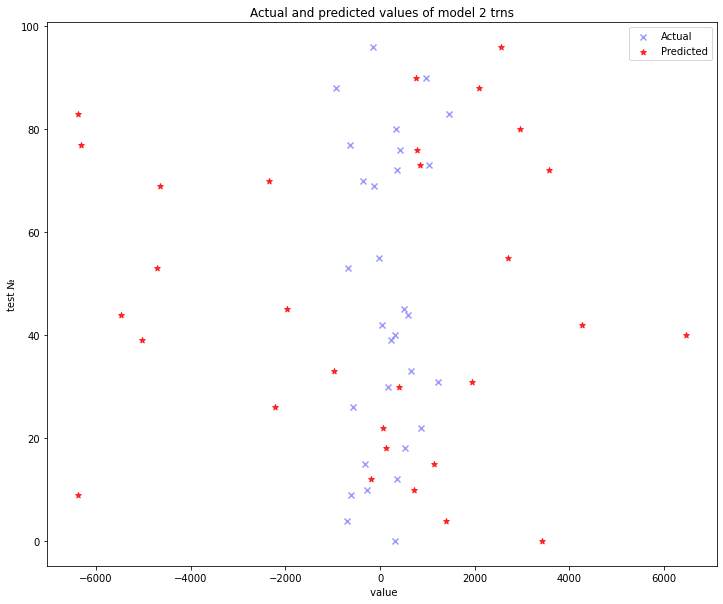

,arg_cnt,func,dense_cnt,mae_train,mae_test
0,12,lin,1,109.582573,263.866302
1,12,lin,2,61.778305,176.540100
2,12,lin,3,52.053375,230.191025
3,12,sqr,1,21788.505859,20508.783203
4,12,sqr,2,9725.157227,26265.628906
5,12,sqr,3,7084.341797,22241.419922
6,12,trns,1,2216.130371,3296.440186
7,12,trns,2,930.528809,3211.174316
8,12,trns,3,914.074524,3084.687012


In [ ]:
res_12 = get_res_12(x)
res_12